# KNeighbors  Classifier Python Implementation

In [6]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

In [7]:
def euclidean_distance(a, b):
    # translate the function written above directly into code given two lists 
    # or vectors a and b. If you wish to use numpy vector math, you'll need to ensure that 
    # these two vectors are np.array()s
    
    #return the distance (a single scalar)
    return np.linalg.norm(a - b)

def cosine_distance(a, b):
    # translate the function written above directly into code given two lists 
    # or vectors a and b. If you wish to use numpy vector math, you'll need to ensure that 
    # these two vectors are np.array()s
    
    #return the distance (a single scalar)
    return a.dot(b.T) / (np.linalg.norm(a) * np.linalg.norm(b))

In [8]:
class KNearestNeighbors(object):
    def __init__(self, k=5, distance=euclidean_distance):
        #**You'll need to store k and distance as attributes of the class
        self.k = k
        self.distance = distance # distance function

    def fit(self, X, y):
        #**Here the intake values are stored as training members of the class
        self.X_train = X
        self.y_train = y

    def predict(self, X_predict):
        
        # Recall that this is a new X and it needs to be the same number of data points as 
        # the training X
        #X_predict = X_predict.reshape( (-1, self.X_train.shape[1]) )
        X_predict = X_predict[:,:self.X_train.shape[1]]
        distances = np.zeros((X_predict.shape[0], self.X_train.shape[0]))
        
        # **You'll need to calculate the distances between each of the training set
        # and prediction set values
        
        for i, x in enumerate(X_predict):
            for j, x_train in enumerate(self.X_train):
                
                #** Calculation of distance goes here
                distances[i][j] = self.distance(x, x_train)
                

        # **Now you'll need to sort the distances and 
        # take the top k members of self.y_train with the smallest distances to each x_i
                
        top_k = self.y_train[distances.argsort()[:,:self.k]]
        result = np.zeros(X_predict.shape[0])
        for i, values in enumerate(top_k):
            #** recall that self.y_train stores the classes we trained the model for, 
            # what we need to return for each of the X_predict is the most likely class it is 
            # amongst the top k. 
            # This is a good place to use a Counter to determine the .most_common(1)[0][0] element
            result[i] = Counter(values).most_common(1)[0][0]
        return result

In [9]:
def error_rate(y_test, y_pred):
    return np.mean(y_test != y_pred)

def accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)

In [13]:
def plot_decision_boundary(X, y, predict_func):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = predict_func(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.title("3-Class classification (k = %i, weights = '%s')"
              #% (n_neighbors, weights))

    return plt.show()

In [10]:
iris = datasets.load_iris()
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [12]:
n_neighbors = 5
knn = KNearestNeighbors(k=n_neighbors, distance=euclidean_distance)
knn.fit(X, y)
knn_pred_y = knn.predict(X)

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
clf_pred_y = clf.predict(X)

print "Accuracy of our model:", accuracy(knn_pred_y, y)
print "Accuracy of sklearn:", accuracy(clf_pred_y, y)
print "Error rate of our model:", error_rate(knn_pred_y, y)

Accuracy of our model: 0.846666666667
Accuracy of sklearn: 0.833333333333
Error rate of our model: 0.153333333333


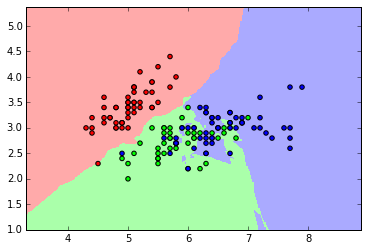

In [14]:
# sklearn model
plot_decision_boundary(X, y, lambda x: clf.predict(x))

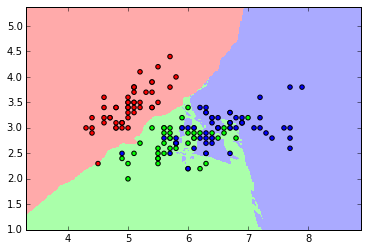

In [15]:
# our data
plot_decision_boundary(X, y, lambda x: knn.predict(x))

In [16]:
from sklearn import metrics
print metrics.classification_report(y, knn_pred_y)
print metrics.confusion_matrix(y, knn_pred_y)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.79      0.74      0.76        50
          2       0.76      0.82      0.79        50

avg / total       0.85      0.85      0.85       150

[[49  1  0]
 [ 0 37 13]
 [ 0  9 41]]
